# <center> Assignment #5 Classification


Use the codes from the colab file:https://colab.research.google.com/drive/1JaVMz13ysflcYa5p7O0iiRE2Vaom3lLY#scrollTo=E3wCrLaJ_CAc which was used for teaching you. You can also open your own copy in your drive if you saved one.

Let's start by loading all necessary libraries:

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn import tree
from IPython.display import display, HTML, Image
import random
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split



## Part 1. Dare 2 Date



We discussed in the Classification class, how a basic decision tree is made. 

Below is a problem, that wil test your understanding of the decision trees, and will help you build a solid understanding of the concepts.

Always remember, a single decision tree does not yield higher accuracy n validation data and are also unstable, meaning the same decsion tree if we run on the same data, we might end up learning other rules (without setting up the random state).

Many performant and State of the Art algorithms like Random forests (discussed in the class) & Gradient boosting are based on Decision trees. That is why knowing how decision trees work is very important.



### Problem Description

<center><img src='https://secure-media1.hotstarext.com/r1/thumbs/PCTV/60/1660/PCTV-1660-hcdl.jpg' width=500></center>

<b>Dare 2 Date</b> was a show on Channel V, where two participants were set up by the show's host for a blind date. At the end of the episode, the participants were asked about the date and if they would like to go out with the other participant for a second date.

I have prepared a toy dataset that replicates the scenario. Person A is deciding whether they will go on a second date with Person B. It will depend on their looks, eloquence, alcohol consumption, and how much money was spent on the first date:)

#### Creating the dataset

In [0]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

In [0]:
import random

#### Training data

The training set is created in a random way, please don't match the data with your Dating experiences and the domain knowledge.

In [0]:
df_train = {}
df_train['Looks'] = ['good', 'good', 'good', 'repulsive',
                         'repulsive', 'repulsive', 'good'] 
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'low', 'low', 'low',
                                   'high', 'high']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = [1,0,1,0,0,0,1] #LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = pd.DataFrame(df_train)
df_train


,Looks,Alcoholic_beverage,Eloquence,Money_spent,Will_go
0,good,yes,high,lots,1
1,good,yes,low,little,0
2,good,no,low,lots,1
3,repulsive,no,low,little,0
4,repulsive,yes,low,lots,0
5,repulsive,yes,high,lots,0
6,good,yes,high,lots,1


In [0]:
df_train['Will_go'].value_counts()

0    4
1    3
Name: Will_go, dtype: int64

#### Test data

In [0]:
df_test = {}
df_test['Looks'] = ['good', 'good', 'repulsive'] 
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['low', 'high', 'low']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test['Will_go'] = [1,0,0]
df_test = pd.DataFrame(df_test)
df_test

,Looks,Alcoholic_beverage,Eloquence,Money_spent,Will_go
0,good,no,low,lots,1
1,good,yes,high,little,0
2,repulsive,yes,low,lots,0


<b>Question 1\. What is the Gini Impurity of the initial system? By system states, we mean values of the binary feature "Will_go" - 0 or 1 - two states in total. </b>

Assume df_train and df_test are created from a single dataset by using train_test_spit function as shown in the class

In [0]:
#Gini Impurity: 0.48
# you can either write code to calculate the Gini Impurity. 1-p(yes)^2-p(no)^2 or you can use a calculator or pen and paer as you wish

<b>Question 2\. Let's split the entire data (hint: concat of df_train and df_test) by the feature "Looks". What is the Gini Impurity $G_1$ of the left group - the one with "Good Looks". What is the entropy $G_2$ in the opposite group? What is the Final Gini Impurity $G$ of the split if we consider such a split?

In [0]:
# use the steps as we used in the giniSheet to calculate
# calculate all the no. of people who have good looks and have will_go = 1, similarly do the rest of the 3 conditions as in gini sheet

# to code in python the counts do below. Note: coding in python is not important for this question, its just for learning
data = pd.concat([df_train,df_test]) #union of df_train & df_test
#count of will_go based on good looks - the left node
print("the left node count of will_go or not (1 & 0 respectively) when split by looks")
print(data[data["Looks"]=="good"]["Will_go"].value_counts())
#similarly write the code for the right node here
print("the right node count of will_go or not (1 & 0 respectively) when split by looks")
print(data[data["Looks"]=="repulsive"]["Will_go"].value_counts())

#Gini Impurity: 0.2666666666


the left node count of will_go or not (1 & 0 respectively) when split by looks
1    4
0    2
Name: Will_go, dtype: int64
the right node count of will_go or not (1 & 0 respectively) when split by looks
0    4
Name: Will_go, dtype: int64


### Label Encoding

Label Encode your data

In [0]:
# Label encoding function
def labelencode(data,columnname):
    data[columnname] = LabelEncoder().fit_transform(data[columnname])

# applying the function to each column on train data
for i in range(0,len(data.columns)):
    labelencode(df_train,data.columns[i])
# applying the function to each column on test data
for i in range(0,len(data.columns)):
    labelencode(df_test,data.columns[i])

df_train,df_test

#Note: Label encoding should be performed on entire data. Please treat this example as an exception.

(   Looks  Alcoholic_beverage  Eloquence  Money_spent  Will_go
 0      0                   1          0            1        1
 1      0                   1          1            0        0
 2      0                   0          1            1        1
 3      1                   0          1            0        0
 4      1                   1          1            1        0
 5      1                   1          0            1        0
 6      0                   1          0            1        1,
    Looks  Alcoholic_beverage  Eloquence  Money_spent  Will_go
 0      0                   0          1            1        1
 1      0                   1          0            0        0
 2      1                   1          1            1        0)

<b>Question 3\. Train a decision tree using random state 42 on the training set. Visualise the decision tree and tell us which feature is the root node.  Ans: Looks

<b>Question 4\. What is the accuracy of your trained model (which you trained for the previous question )on the test data? Ans:100%

In [0]:
# Enter your code here for both questions above

# features to consider for model building

# Initialise Decision tree
clf = DecisionTreeClassifier(random_state=42)
# Fit or train the decision tree for your training set
clf.fit(df_train[features], df_train["Will_go"])
# Make predictions
predictions = clf.predict(df_test[features])
# calculate accuracy
score = clf.score(df_test[features], df_test["Will_go"])
print("Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer Will_go or not")
# visualise the decision tree

Accuracy:  1.0
100.00% times correctly predicted whether the customer Will_go or not


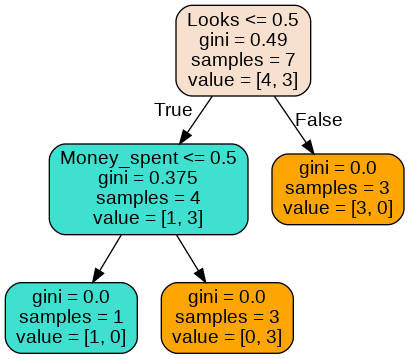

In [0]:
dot_data = tree.export_graphviz(clf,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

Image(graph.create_png())

In [0]:
pd.DataFrame(data = {'Actual Label':df_test['Will_go'],'Predicted Label':predictions})

,Actual Label,Predicted Label
0,1,1
1,0,0
2,0,0


-----------------------------------------------------------------------

<center>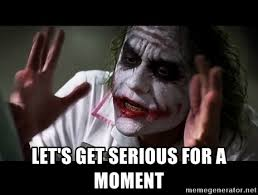

## Part 2. The "Adult Income" dataset

### Dataset description:

[Dataset](https://drive.google.com/open?id=1-Hx6mFfxetRPP7Yd0k_e_7biRK4pjwiF). Use this link to add the dataset to your google drive. Mount your drive to get access the dataset using read csv function with proper path.

UCI Adult (no need to download it, we have a copy in the course repository): classify people using demographical data - whether they earn more than \$50,000 per year or not.

Feature descriptions:

- **Age** – continuous feature
- **Workclass** –  continuous feature
- **fnlwgt** – final weight of object, continuous feature
- **Education** –  categorical feature
- **Education_Num** – number of years of education, continuous feature
- **Martial_Status** –  categorical feature
- **Occupation** –  categorical feature
- **Relationship** – categorical feature
- **Race** – categorical feature
- **Sex** – categorical feature
- **Capital_Gain** – continuous feature
- **Capital_Loss** – continuous feature
- **Hours_per_week** – continuous feature
- **Country** – categorical feature

**income** – earnings level, categorical (binary) feature.

*ALL the steps for EDA, Cleaning and Preprocessing needs to be run to move with to attempt the questions as cells might be related. This will also give you idea of the entire problem.*

### Reading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# change the file path according to where you have added the dataset in your file
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data.xlsx')

In [0]:
data.shape

(10077, 14)

In [0]:
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,CAPITAL_GAIN,CAPITAL_LOSS,HOURS PER WEEK,COUNTRY,CLASS
0,66,?,107744,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,0,0,40,United-States,1
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,1
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,0
4,33,?,207668,Bachelors,13,Never-married,?,Own-child,Male,0,0,40,United-States,0


### Target variable


In [6]:
# encode target variable as integer
data.loc[data['income']=='<=50K', 'income'] = 0
data.loc[data['income']=='>50K', 'income'] = 1
data['income'] = data['income'].astype('int')

KeyError: ignored

In [7]:
data['CLASS'].value_counts() # look at the counts of each of 

0    7625
1    2452
Name: CLASS, dtype: int64

### EDA
The EDA is being given to give you an idea of how to do exploratory analysis on the dataset ans some interesting coding techniques as well.

In [8]:
data.describe(include='all').T # T transposes the table

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AGE,10077,NaN,NaN,NaN,37.8318,13.8101,17,26,37,47,90
WORKCLASS,10077,9,Private,6360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FNLWGT,10077,NaN,NaN,NaN,191069,107444,13492,117778,178551,238574,1.36612e+06
EDUCATION,10077,16,HS-grad,3720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION_NUM,10077,NaN,NaN,NaN,10.1,2.72082,1,9,9,13,16
MARTIAL_STATUS,10077,7,Married-civ-spouse,4770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCCUPATION,10077,15,Prof-specialty,2546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RELATIONSHIP,10077,6,Husband,4034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,10077,2,Male,6173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAPITAL_GAIN,10077,NaN,NaN,NaN,0,0,0,0,0,0,0


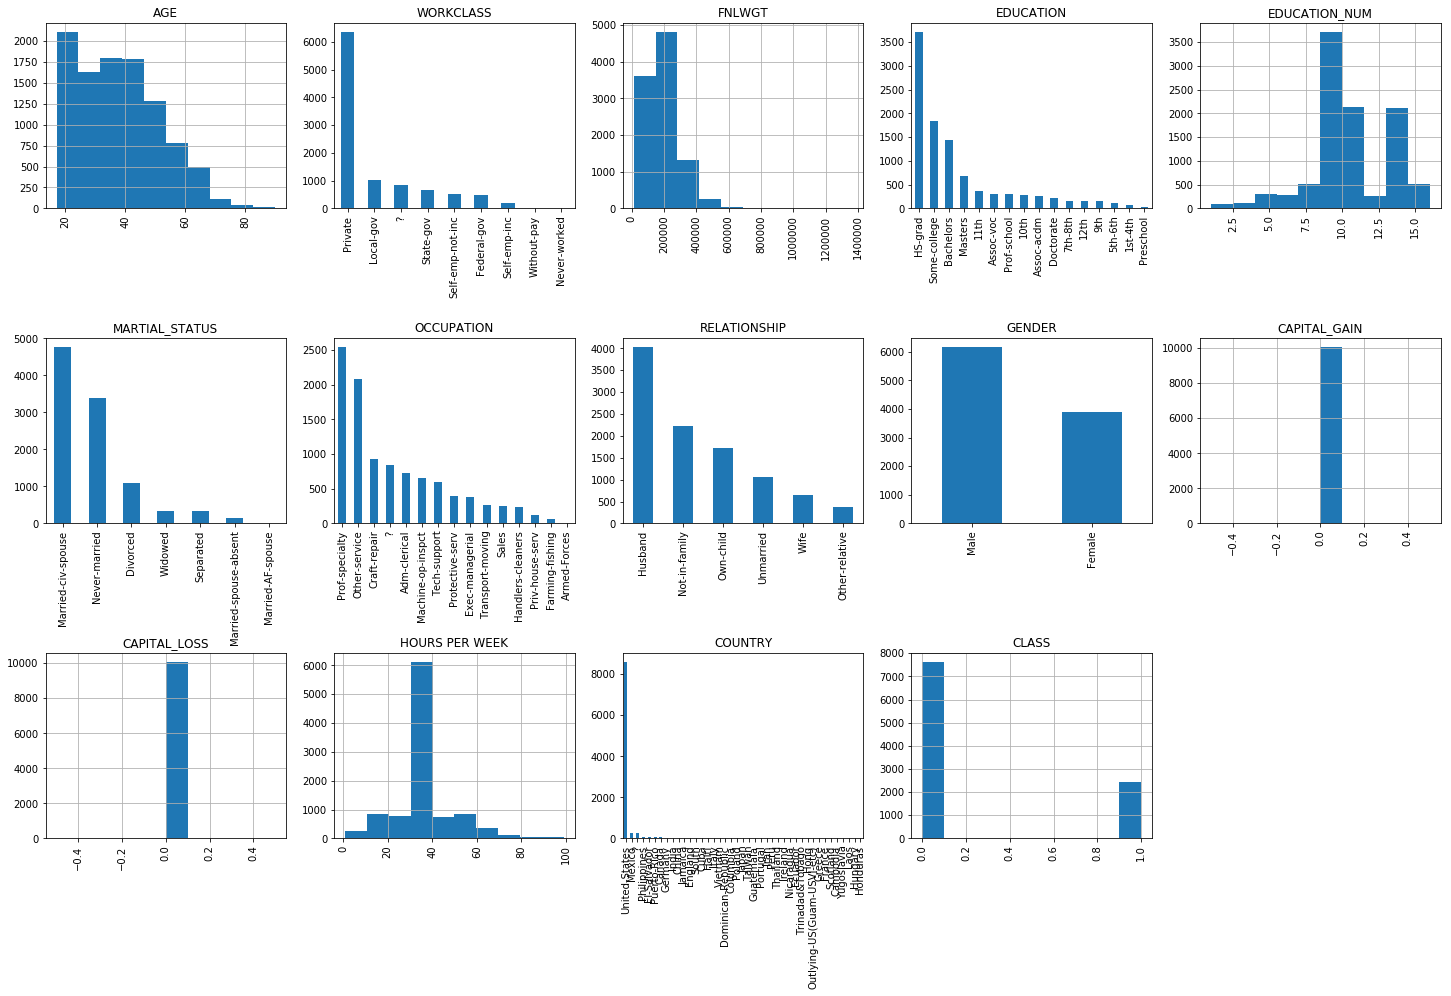

In [9]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### Checking data types

In [0]:
data.dtypes

AGE                int64
WORKCLASS         object
FNLWGT             int64
EDUCATION         object
EDUCATION_NUM      int64
MARTIAL_STATUS    object
OCCUPATION        object
RELATIONSHIP      object
GENDER            object
CAPITAL_GAIN       int64
CAPITAL_LOSS       int64
HOURS PER WEEK     int64
COUNTRY           object
CLASS              int64
dtype: object

In [0]:
#Check for misssing values
data.isnull().sum()

AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION_NUM     0
MARTIAL_STATUS    0
OCCUPATION        0
RELATIONSHIP      0
GENDER            0
CAPITAL_GAIN      0
CAPITAL_LOSS      0
HOURS PER WEEK    0
COUNTRY           0
CLASS             0
dtype: int64

## Preprocessing the data
###One hot encoding: 
Creating a column out of each value of a categorical column or variable.

In [20]:
# choose categorical and continuous features from data

categorical_columns = [c for c in data.columns 
                       if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns 
                     if data[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['WORKCLASS', 'EDUCATION', 'MARTIAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'GENDER', 'COUNTRY']
numerical_columns: ['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS', 'HOURS PER WEEK', 'CLASS']


We'll dummy code or One hot encode some categorical features: **Workclass**, **Education**, **Martial_Status**, **Occupation**, **Relationship**, **Race**, **Sex**, **Country**. It can be done via pandas method **get_dummies**

In [11]:
## this how get_dummies will return results
pd.get_dummies(data[categorical_columns]).head()

,WORKCLASS_?,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,WORKCLASS_State-gov,WORKCLASS_Without-pay,EDUCATION_10th,EDUCATION_11th,EDUCATION_12th,EDUCATION_1st-4th,EDUCATION_5th-6th,EDUCATION_7th-8th,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college,MARTIAL_STATUS_Divorced,MARTIAL_STATUS_Married-AF-spouse,MARTIAL_STATUS_Married-civ-spouse,MARTIAL_STATUS_Married-spouse-absent,MARTIAL_STATUS_Never-married,MARTIAL_STATUS_Separated,MARTIAL_STATUS_Widowed,OCCUPATION_?,OCCUPATION_Adm-clerical,OCCUPATION_Armed-Forces,OCCUPATION_Craft-repair,OCCUPATION_Exec-managerial,OCCUPATION_Farming-fishing,OCCUPATION_Handlers-cleaners,OCCUPATION_Machine-op-inspct,...,COUNTRY_Cambodia,COUNTRY_Canada,COUNTRY_China,COUNTRY_Columbia,COUNTRY_Cuba,COUNTRY_Dominican-Republic,COUNTRY_Ecuador,COUNTRY_El-Salvador,COUNTRY_England,COUNTRY_France,COUNTRY_Germany,COUNTRY_Greece,COUNTRY_Guatemala,COUNTRY_Haiti,COUNTRY_Honduras,COUNTRY_Hong,COUNTRY_Hungary,COUNTRY_India,COUNTRY_Iran,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Jamaica,COUNTRY_Japan,COUNTRY_Laos,COUNTRY_Mexico,COUNTRY_Nicaragua,COUNTRY_Outlying-US(Guam-USVI-etc),COUNTRY_Peru,COUNTRY_Philippines,COUNTRY_Poland,COUNTRY_Portugal,COUNTRY_Puerto-Rico,COUNTRY_Scotland,COUNTRY_South,COUNTRY_Taiwan,COUNTRY_Thailand,COUNTRY_Trinadad&Tobago,COUNTRY_United-States,COUNTRY_Vietnam,COUNTRY_Yugoslavia
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


['AGE', 'FNLWGT', 'EDUCATION_NUM', 'HOURS PER WEEK', 'CLASS']


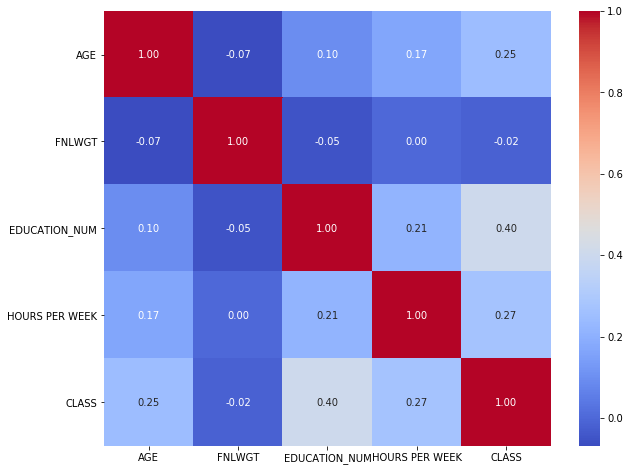

In [28]:
# Correlation matrix between numerical values
nonzero_numerical_columns = numerical_columns.copy()
nonzero_numerical_columns.remove('CAPITAL_GAIN')
nonzero_numerical_columns.remove('CAPITAL_LOSS')
print(nonzero_numerical_columns)
g = sns.heatmap(data[nonzero_numerical_columns].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
fig = g.get_figure()
fig.savefig("/content/drive/My Drive/Colab Notebooks/corr_matrix.png")
g

In [0]:
# we will use pd.get_dummies to create one hot encoding for the categorical variables and join them with the numerical columns to form the dataset
df = pd.concat([data[numerical_columns],pd.get_dummies(data[categorical_columns])], axis=1)

In [0]:
df.head()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS PER WEEK,CLASS,WORKCLASS_?,WORKCLASS_Federal-gov,WORKCLASS_Local-gov,WORKCLASS_Never-worked,WORKCLASS_Private,WORKCLASS_Self-emp-inc,WORKCLASS_Self-emp-not-inc,WORKCLASS_State-gov,WORKCLASS_Without-pay,EDUCATION_10th,EDUCATION_11th,EDUCATION_12th,EDUCATION_1st-4th,EDUCATION_5th-6th,EDUCATION_7th-8th,EDUCATION_9th,EDUCATION_Assoc-acdm,EDUCATION_Assoc-voc,EDUCATION_Bachelors,EDUCATION_Doctorate,EDUCATION_HS-grad,EDUCATION_Masters,EDUCATION_Preschool,EDUCATION_Prof-school,EDUCATION_Some-college,MARTIAL_STATUS_Divorced,MARTIAL_STATUS_Married-AF-spouse,MARTIAL_STATUS_Married-civ-spouse,MARTIAL_STATUS_Married-spouse-absent,MARTIAL_STATUS_Never-married,MARTIAL_STATUS_Separated,MARTIAL_STATUS_Widowed,OCCUPATION_?,...,COUNTRY_Cambodia,COUNTRY_Canada,COUNTRY_China,COUNTRY_Columbia,COUNTRY_Cuba,COUNTRY_Dominican-Republic,COUNTRY_Ecuador,COUNTRY_El-Salvador,COUNTRY_England,COUNTRY_France,COUNTRY_Germany,COUNTRY_Greece,COUNTRY_Guatemala,COUNTRY_Haiti,COUNTRY_Honduras,COUNTRY_Hong,COUNTRY_Hungary,COUNTRY_India,COUNTRY_Iran,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Jamaica,COUNTRY_Japan,COUNTRY_Laos,COUNTRY_Mexico,COUNTRY_Nicaragua,COUNTRY_Outlying-US(Guam-USVI-etc),COUNTRY_Peru,COUNTRY_Philippines,COUNTRY_Poland,COUNTRY_Portugal,COUNTRY_Puerto-Rico,COUNTRY_Scotland,COUNTRY_South,COUNTRY_Taiwan,COUNTRY_Thailand,COUNTRY_Trinadad&Tobago,COUNTRY_United-States,COUNTRY_Vietnam,COUNTRY_Yugoslavia
0,66,107744,10,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,37,106043,9,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,35,953588,9,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,20,157595,9,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,33,207668,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<b>Question 5. Using the codes you wrote for previous question, use the entire pipeline to create 3 decision trees and calculate the average accuracy from them.
This will give you a good practice and help you in understanding different parameters in decision tree.

Parameters for the decision tree:
1. 1st Decision tree -  random_state = 42
2. 2nd Decision tree - random_state = 30
3. 3rd Decision tree - random_state = 30, max_depth = 5
4. 4th Decision tree - random_state = 30,min_impurity_decrease  = 0.01
4. 5th decision tree - random_state = 30, criterion = "entropy"


In [0]:
# code skeleton for the question


# splitting the dataset in to train and test, this was not done in the previous question, refer the code shared in class for the code for this
# note for spitting the dataset keep test_size =0.3, random state = 42, so that your answers are reporducible and similar to my answers


# features to consider for model building

# Initialise the 1st Decision tree

# Fit or train the decision tree for your training set

# Make predictions

# calculate accuracy for 1st decsion tree

# visualise decision tree (you can visualise for your understanding but not required for the question)

# Initialise the 1st Decision tree

# Fit or train the decision tree for your training set

# Make predictions

# calculate accuracy for 1st decsion tree

# visualise decision tree (you can visualise for your understanding but not required for the question)


#-----------you can enter this code in the next cell----------

# Initialise the 2nd Decision tree

# Fit or train the decision tree for your training set

# Make predictions

# calculate accuracy for 2nd decsion tree

# visualise decision tree (you can visualise for your understanding but not required for the question)


#-----------you can enter this code in the next cell----------

# Initialise the 3rd Decision tree

# Fit or train the decision tree for your training set

# Make predictions

# calculate accuracy for 3rd decsion tree

# visualise decision tree (you can visualise for your understanding but not required for the question)


#-----------you can enter this code in the next cell----------

# Initialise the 4thrd Decision tree

# Fit or train the decision tree for your training set

# Make predictions

# calculate accuracy for 4th decsion tree

# visualise decision tree (you can visualise for your understanding but not required for the question)

#-----------you can enter this code in the next cell----------

# Initialise the 5th Decision tree

# Fit or train the decision tree for your training set

# Make predictions

# calculate accuracy for 3rd decsion tree

# visualise decision tree (you can visualise for your understanding but not required for the question)



# Now you can manually calculate the average of accuracies or write a code to do the same, its upto you






In [0]:
features = df.drop(["CLASS"], axis=1).columns
print(features)

Index(['AGE', 'FNLWGT', 'EDUCATION_NUM', 'CAPITAL_GAIN', 'CAPITAL_LOSS',
       'HOURS PER WEEK', 'WORKCLASS_?', 'WORKCLASS_Federal-gov',
       'WORKCLASS_Local-gov', 'WORKCLASS_Never-worked',
       ...
       'COUNTRY_Portugal', 'COUNTRY_Puerto-Rico', 'COUNTRY_Scotland',
       'COUNTRY_South', 'COUNTRY_Taiwan', 'COUNTRY_Thailand',
       'COUNTRY_Trinadad&Tobago', 'COUNTRY_United-States', 'COUNTRY_Vietnam',
       'COUNTRY_Yugoslavia'],
      dtype='object', length=102)


In [0]:
df_train, df_val = train_test_split(df, test_size=0.30, random_state = 42)
df_train.shape

(7053, 103)

In [0]:
# Initialise Decision tree 1
clf1 = DecisionTreeClassifier(random_state=42) # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf1.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf1.predict(df_val[features])

score = clf1.score(df_val[features], df_val["CLASS"])
print("DT1: Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer Income greater than 50K or not")

DT1: Accuracy:  0.80589
80.59% times correctly predicted whether the customer Income greater than 50K or not


In [0]:
# Initialise Decision tree 2
clf2 = DecisionTreeClassifier(random_state=30) # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf2.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf2.predict(df_val[features])

score = clf2.score(df_val[features], df_val["CLASS"])
print("DT2: Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer Income greater than 50K or not")

DT2: Accuracy:  0.8039
80.39% times correctly predicted whether the customer Income greater than 50K or not


In [0]:
# Initialise Decision tree 3
clf3 = DecisionTreeClassifier(random_state=30, max_depth=5) # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf3.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf3.predict(df_val[features])

score = clf3.score(df_val[features], df_val["CLASS"])
print("DT3: Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer Income greater than 50K or not")

DT3: Accuracy:  0.8459
84.59% times correctly predicted whether the customer Income greater than 50K or not


In [0]:
# Initialise Decision tree 4
clf4 = DecisionTreeClassifier(random_state = 30,min_impurity_decrease = 0.01) # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf4.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf4.predict(df_val[features])

score = clf4.score(df_val[features], df_val["CLASS"])
print("DT4: Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer Income greater than 50K or not")

DT4: Accuracy:  0.83631
83.63% times correctly predicted whether the customer Income greater than 50K or not


In [0]:
# Initialise Decision tree 5
clf5 = DecisionTreeClassifier( random_state = 30, criterion = "entropy") # random state helps you in reporducing your results by setting up seed
# Fit or train the decision tree for your training set
clf5.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf5.predict(df_val[features])

score = clf5.score(df_val[features], df_val["CLASS"])
print("DT5: Accuracy: ", round(score,5))
print('{:.2%}'.format(score),"times correctly predicted whether the customer Income greater than 50K or not")

DT5: Accuracy:  0.8125
81.25% times correctly predicted whether the customer Income greater than 50K or not


<b> Question 6: Visualise the 3rd Decision tree from previous question. Look at level 3 nodes and identify which node has minimum gini impurity. Select the feature name in this node from the options below. Note: Consider Root node as level 0 nodes, 1st set of internal nodes as level 1 nodes. Answer: Occupation_Farming_fishing

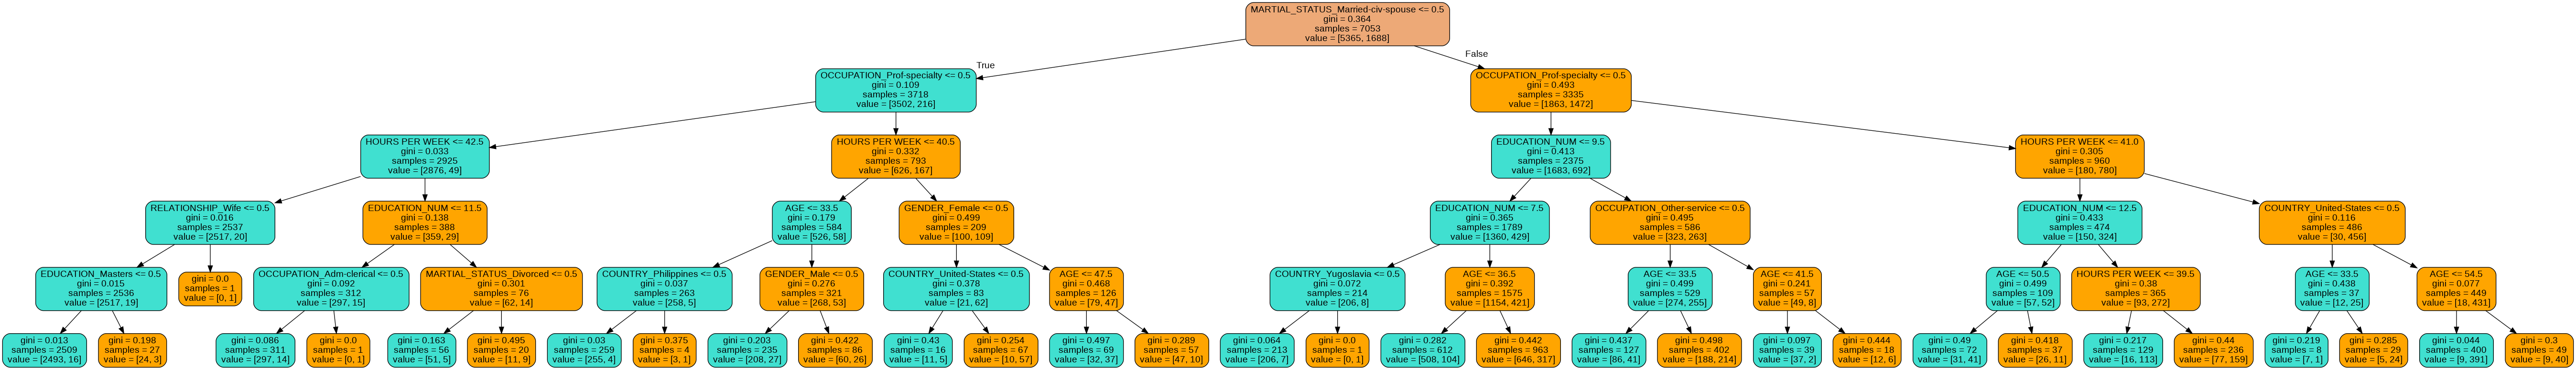

In [0]:
# code for visualisation
dot_data = tree.export_graphviz(clf3,
                                feature_names=features,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

Image(graph.create_png())

<b>Qustion 7: Use grid search with cv=3 and param_grid as shown below (rest parameters as default) and train a decision tree (use DecisionTreeClassifier(random_state=17) to initialise the decision tree) to find the best max_depth for the tree. Use param_grid = {
    'max_depth': range(2,11) 
}      ANS: Max_depth = 9

In [0]:
# code for grid search
from pprint import pprint
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = { 'max_depth': range(2,11) }
# Create a based model
rf = DecisionTreeClassifier(random_state=17) 
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
pprint(param_grid)

{'max_depth': range(2, 11)}


In [0]:
# Fit the grid search to the data
grid_search.fit(df_train[features], df_train["CLASS"])
pprint(grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'max_depth': 5}


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:    2.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    2.3s finished


<b>Question 8: Train a random forest on the training dataset and calculate the accuracy, precision and recall on the test data or validation data. Split your the adult dataset as earlier with random state = 42. Random state for random forest classifier should be 50, number of trees = 100, oob_score = True, n_jobs = -1, max_features = None. Print the confusion matrix and tell us the number of TP, FP, FN, TN.
  
  
  
  Accuracy:  0.8627584794922541
[[10439   794]
 [ 1217  2203]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     11233
           1       0.74      0.64      0.69      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.86      0.86     14653


In [0]:
# Initialise Random Forest
clf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,random_state =50, max_features = None)
# Fit on training data
clf.fit(df_train[features], df_train["CLASS"])

# Make predictions
predictions = clf.predict(df_val[features])

# Performance measures
score = clf.score(df_val[features], df_val["CLASS"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["CLASS"],predictions))
print(classification_report(df_val["CLASS"],predictions))


Accuracy:  0.8472222222222222
[[2062  198]
 [ 264  500]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2260
           1       0.72      0.65      0.68       764

    accuracy                           0.85      3024
   macro avg       0.80      0.78      0.79      3024
weighted avg       0.84      0.85      0.84      3024



In [0]:
tn, fp, fn, tp = confusion_matrix(df_val["CLASS"],predictions).ravel()
print('True Negative:', tn, 'False Positive:', fp)
print('False Negative:', fn,'True Positive:', tp)


True Negative: 2062 False Positive: 198
False Negative: 264 True Positive: 500


<b>Question 9: Use Random search from scikit learn with cv=3 and param_distributions as shown below, random_sate = 42, iter =5 (rest parameters as default) and train a random forest(use RandomForestClassifier(random_state=42) to initialise the Random forest) to find the best estimator. 

Use param_distributions= {'bootstrap': [True, False],
 'max_depth': range(10,100,20),
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': range(100,1000,200)}.
  
  
  Calculate the % improvement in the accuracy from the best estimator compared to the vanilla random forest model created in previous question.

  Refer to the link: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
  
  
  Accuracy:  0.8728588002456835
[[10650   583]
 [ 1280  2140]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     11233
           1       0.79      0.63      0.70      3420

    accuracy                           0.87     14653
   macro avg       0.84      0.79      0.81     14653
weighted avg       0.87      0.87      0.87     14653

In [0]:
#RandomizedSearchCV(estimator = rf, param_distributions = param_distributions, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_distributions= {'bootstrap': [True, False], 'max_depth': range(10,100,20), 'min_samples_leaf': [1, 2, 4], 'n_estimators': range(100,1000,200)}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_distributions, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
pprint(param_distributions)

grid_search.fit(df_train[features], df_train["CLASS"])
pprint(grid_search.best_params_)

{'bootstrap': [True, False],
 'max_depth': range(10, 100, 20),
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': range(100, 1000, 200)}
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   32.1s finished


{'bootstrap': False,
 'max_depth': 50,
 'min_samples_leaf': 4,
 'n_estimators': 700}


In [0]:
#use same codes shared in the class to find the accuracy
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(df_val[features])

# Performance measures
score = best_grid.score(df_val[features], df_val["CLASS"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["CLASS"],predictions))
print(classification_report(df_val["CLASS"],predictions))

Accuracy:  0.8584656084656085
[[2135  125]
 [ 303  461]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2260
           1       0.79      0.60      0.68       764

    accuracy                           0.86      3024
   macro avg       0.83      0.77      0.80      3024
weighted avg       0.85      0.86      0.85      3024



### Your Journey Begins....

<center><img src="https://media1.tenor.com/images/3e1f9a2cc482719b8cff02ba655f8b10/tenor.gif?itemid=9925719" width = 700></center>